In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
DEPTH_MD = 'DEPTH_MD'
RHOB_T = 'RHOB_T'
RHOB = 'RHOB'
NPHI_T = 'NPHI_T'
NPHI = 'NPHI'
GR_T = 'GR_T'
GR = 'GR'
PEF_T = 'PEF_T'
PEF = 'PEF'
DTC_T = 'DTC_T'
DTC = 'DTC' 

In [3]:
df = pd.read_csv('force2020_data_unsupervised_learning.csv', index_col= DEPTH_MD)

In [4]:
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [5]:
df.dropna(inplace=True) # fehlenden Einträge in Zeilen werden entfernt (min 1)

In [6]:
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085
...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836


In [7]:
df.describe() # describe() ist eine Methode von Pandas, die statistische Kennzahlen über alle numerischen Spalten ausgibt:

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [8]:
# Du erzeugst eine Instanz von StandardScaler aus sklearn, das deine Daten auf Mittelwert 0 und Standardabweichung 1 normiert.
# StandardScaler stellt sicher, dass alle Variablen vergleichbar sind und der Algorithmus nicht von der Einheit
# oder Größenordnung der Daten „getäuscht“ wird.
scaler = StandardScaler()

In [9]:
df[[RHOB_T, NPHI_T, GR_T, PEF_T, DTC_T]] = scaler.fit_transform(df[[RHOB, NPHI, GR, PEF, DTC]])

In [17]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910


## Identifying Optimum Number of Clusters 
#### I am working with the Elbow Method 
##### It allows us to plot the inertia, which is a meansure of how well the data was clustered by the K-Means algorithm, against the number of clusters. From this plot, we are looknh for a point where the internia begins to slow 

In [18]:
# creating function to work out optimum number of clusters 

def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    #Generate the elbow plot 

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

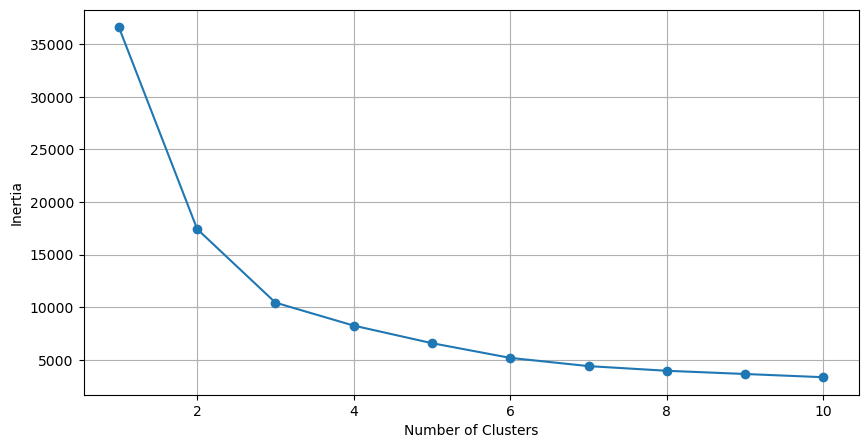

In [ ]:
optimise_k_means(df[[RHOB_T, NPHI_T, GR_T]],10)

Applying K Means Clustering 

In [19]:
kmeans = KMeans(n_clusters=3) # Du erstellst einen KMeans-Klassifizierer mit genau 3 Clustern.

In [20]:
kmeans.fit(df[[NPHI_T, RHOB_T]]) # Trainierst das Modell mit den zwei skalierten Variablen.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
df['kmeans_3'] = kmeans.labels_ # Die Clusterzugehörigkeit (Label 0, 1 oder 2) wird als neue Spalte kmeans_3 im DataFrame gespeichert.
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,2
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,2
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,2


In [22]:
cluster_2 = df[df['kmeans_3'] == 2]
cluster_2

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1311.072,2.225775,62.079327,0.376575,3.644345,93.377556,0.301406,-0.272970,0.027606,-0.147490,-0.922325,2
1311.224,2.272109,67.675674,0.324001,3.031521,98.523514,0.485575,-0.650653,0.214766,-0.484789,-0.753012,2
1311.376,2.192962,71.732208,0.324558,2.595576,117.588165,0.170980,-0.646650,0.350429,-0.724733,-0.125744,2
1432.976,2.285066,66.798653,0.419178,3.665702,137.461960,0.537076,0.033085,0.185436,-0.135735,0.528148,2
1433.128,2.198775,78.691673,0.413344,3.079715,137.341843,0.194085,-0.008827,0.583176,-0.458263,0.524195,2
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,2
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,2
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,2


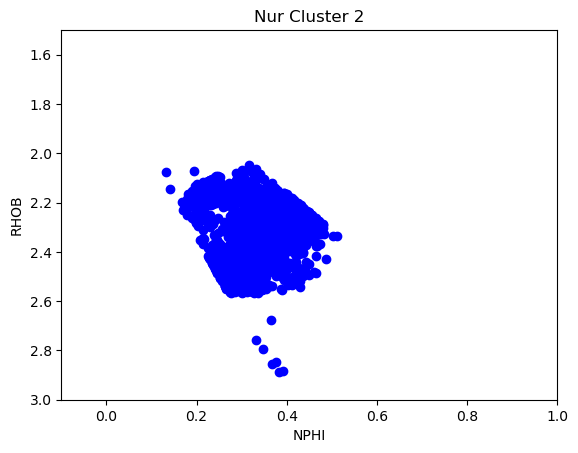

In [23]:
plt.scatter(x=cluster_2[NPHI], y=cluster_2[RHOB], c='blue')
plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.title('Nur Cluster 2')
plt.show()

Plotting the results 

<function matplotlib.pyplot.show(close=None, block=None)>

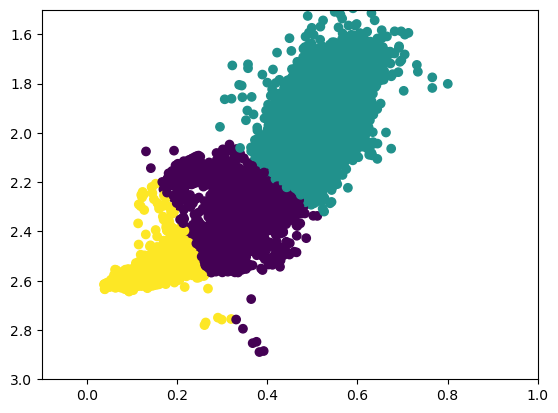

In [21]:
plt.scatter(x=df[NPHI], y=df[RHOB], c =df['kmeans_3'])
plt.xlim(-0.1,1)
plt.ylim(3,1.5)
plt.show

Creating Multiple Clusters 

In [22]:
for k in range (1,6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[[RHOB_T, NPHI_T]])
    df[f'KMeans_{k}'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [23]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPTH_MD,,,,,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,1,0,1,1,0,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,1,0,1,1,0,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,1,0,1,1,0,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,1,0,1,1,0,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,0,0,0,0,1,1
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,0,0,0,0,1,1
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,0,0,0,0,1,1


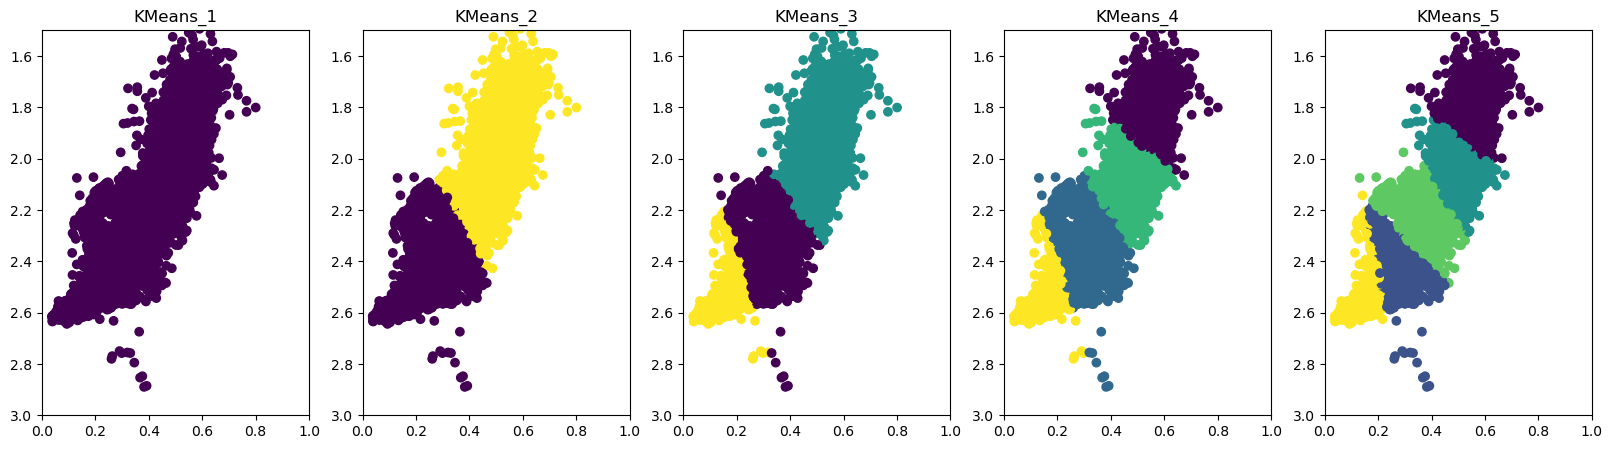

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1): 
    ax.scatter(x=df[NPHI], y=df[RHOB], c =df[f'KMeans_{i}'])
    ax.set_ylim(3,1.5)
    ax.set_xlim(0,1)
    ax.set_title(f'KMeans_{i}')
